_Dieses Notebook ist ein Skript (Drehbuch) zur Vorstellung grundlegender Funktionen von Jupyter, Python, Pandas und matplotlib, um ein Gefühl für die Arbeit mit den Bibliotheken zu bekommen. Daher ist das gewählte Beispiel so gewählt, dass wir typische Aufgaben während einer Datenanalyse bearbeiten._

# Jupyter
Das hier ist Jupyter, die interaktive Notebook-Umgebung zum Programmieren. Wir sehen hier eine Zelle, in der wir Python-Code eingeben können. Geben wir einfach einmal einen String namens `"Hello World"` ein. Mit der Tastenkombination `Strg` + `Enter`.

In [1]:
"Hello World"

'Hello World'

# Git-Historienanalyse
In diesem Notebook wollen wir uns die Entwicklungsgeschichte des Open-Source-Projekts "Linux" anhand der Historie des dazugehörigen Git-Repositories ein wenig genauer ansehen.

Das GitHub-Repository https://github.com/torvalds/linux/ wurde dafür über den Befehl  

```
git clone https://github.com/torvalds/linux.git
```

auf die lokale Festplatte geklont.

Die für diese Auswertung relevanten Teile der Historie wurde mittels

```
git log --pretty="%ad,%aN" --no-merges > git_demo_timestamp_linux.csv
```
exportiert. Dieser Befehl liefert pro Commit des Git-Repositories den Zeitstempel des Commits (`%ad`) sowie den Namen des Autors (`%aN`). Die jeweiligen Werte sind kommasepariert. Wir geben zusätzlich mit an, dass wir reine Merge-Commits nicht erhalten wollen (über `--no-merges`). Das Ergebnis der Ausgabe speichern wir in die Datei `git_demo_timestamp_linux.csv`.

_Hinweis: Für eine optimierte Demo wurden manuell noch Header und das Trennzeichen geändert, um schneller durch die Analyse zu kommen. Die Unterschiede sind unter https://www.feststelltaste.de/developers-habits-linux-edition/ zu sehen, welcher mit dem Original-Datensatz durchgeführt wurde._

# Pandas
Nun können wir diese Daten mit Hilfe des Datenanalyse-Frameworks Pandas einlesen. Wir importieren dazu `pandas` mit der gängigen Abkürzung `pd` mittels der `import ... as ...` Syntax von Pyhton.

In [2]:
import pandas as pd

Ob das Importieren des Moduls auch wirklich funktioniert hat, können wir prüfen, in dem wir mit dem `pd`-Modul arbeiten. Dazu hängen wir an die `pd`-Variable den `?` Operator an und führen die Zelle aus. Es erscheint die Dokumentation des Moduls im unteren Bereich des Notebooks. Diesen Bereich können wir durchlesen und mit der Taste `ESC` auch wieder verschwinden lassen.

In [3]:
pd?

Danach lesen wir die oben beschriebene und gepackte CSV-Datei `git_demo_timestamp_linux.gz` im Verzeichnis `../dataset` ein und speichern das Ergebnis in der Variable `git_log`.

Als Ergebnis haben wir nun die Daten in einen `DataFrame` (so etwas ähnliches wie ein programmierbares Excel-Arbeitsblatt) geladen, der in unserem Fall aus zwei `Series` (in etwa Spalten) besteht. Auf den `DataFrame` können wir nun Operationen ausführen. Z. B. können wir uns mittels `head()` die fünf ersten Einträge anzeigen lassen.

In [4]:
git_log = pd.read_csv("../dataset/git_demo_timestamp_linux.gz")
git_log.head()

,timestamp,author
0,2017-12-31 14:47:43,Linus Torvalds
1,2017-12-31 13:13:56,Linus Torvalds
2,2017-12-31 13:03:05,Linus Torvalds
3,2017-12-31 12:30:34,Linus Torvalds
4,2017-12-31 12:29:02,Linus Torvalds


Als nächstes rufen wir `info()` auf den `DataFrame` auf, um einige Eckdaten über die eingelesenen Daten zu erhalten.

In [5]:
git_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723214 entries, 0 to 723213
Data columns (total 2 columns):
timestamp    723214 non-null object
author       723213 non-null object
dtypes: object(2)
memory usage: 11.0+ MB


Den Zugriff auf die einzelnen Series können wir mittels der Schreibeweise `[<spaltenname>]` oder (in den meisten Fällen) per direkter Nutzung des Namens der `Series` erreichen.

In [6]:
git_log.author.head()

0    Linus Torvalds
1    Linus Torvalds
2    Linus Torvalds
3    Linus Torvalds
4    Linus Torvalds
Name: author, dtype: object

Auch auf einer `Series` selbst können wir verschiedene Operationen ausführen. Z. B. können wir mit `value_counts()` die in einer `Series` enthaltenen Werte zählen und nach gleichzeitig nach ihrer Häufigkeit sortieren lassen. Das Ergebnis ist wieder eine `Series`, diesmal aber mit den zusammengezählten und sortieren Werten. Auf diese `Series` können wir zusätzlich ein `head(10)` aufrufen. So erhalten wir eine schnelle Möglichkeit, die TOP-10-Werte einer `Series` anzeigen zu lassen. Das Ergebnis können wir dann in einer Variable `top10` festhalten und ausgeben lassen, in dem wir die Variable in die nächste Zellenzeile schreiben.

In [7]:
top10 = git_log.author.value_counts().head(10)
top10

Linus Torvalds           24259
David S. Miller           9563
Mark Brown                6917
Takashi Iwai              6293
Al Viro                   6064
H Hartley Sweeten         5942
Ingo Molnar               5462
Mauro Carvalho Chehab     5384
Arnd Bergmann             5305
Greg Kroah-Hartman        4687
Name: author, dtype: int64

## Plotten/Visualisierung
Als nächstes wollen wir das Ergebnis visualisieren bzw. plotten. Um die das Plot-Ergebnis der intern verwendeten Plotting-Bibliothek `matplotlib` direkt im Notebook anzuzeigen, müssen wir Jupyter dies mit dem Magic-Kommando

```
%matplotlib inline
```

vor dem Aufruf der `plot()` Methode mitteilen.

Standardmäßig wird beim Aufruf von `plot()` auf einen `DataFrame` oder einer `Series` ein Liniendiagramm erstellt.

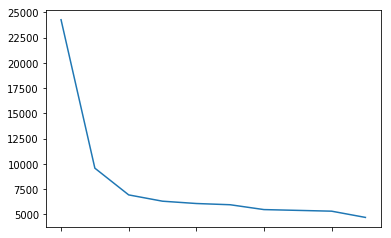

In [8]:
%matplotlib inline
top10.plot()

Für diese Daten bietet sich eher eine Visualisierung als Tortendiagramm an. Hierfür rufen wir die Untermethode `pie()` von `plot` auf.

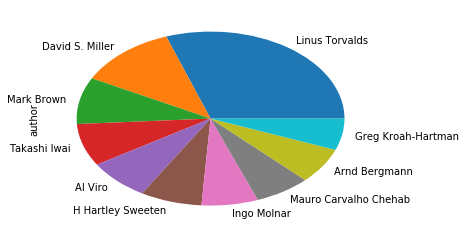

In [9]:
top10.plot.pie()

Das Diagramm sieht hier jedoch nicht sehr schön aus.

Mit den optionalen Styling-Parametern können wir erreichen, dass wir eine schönere Grafik angezeigt bekommen. Wir verwenden dazu
* `figsize=[7,7]` als Größenangabe
* `title="Top 10 Autoren"` als Titel
* `label="", um die überflüssige Beschriftung nicht anzuzeigen.

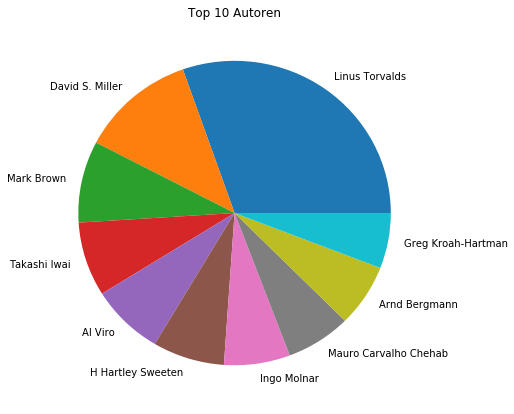

In [10]:
top10.plot.pie(
    figsize=[7,7],
    title="Top 10 Autoren",
    label="")

# _Zusatz (nicht Teil der Demo)_

## Arbeiten mit Datumsangaben
Nun widmen wir uns den Zeitstempelangaben. Wir wollen herausfinden, zu welcher Tageszeit die Entwickler committen.

In [11]:
git_log.timestamp.head()

0    2017-12-31 14:47:43
1    2017-12-31 13:13:56
2    2017-12-31 13:03:05
3    2017-12-31 12:30:34
4    2017-12-31 12:29:02
Name: timestamp, dtype: object


Bevor wir in die Welt der Zeitreihenverarbeitung einsteigen können, müssen wir unsere Spalte mit den Datumsangabe zuerst in den passenden Datentyp umwandeln. Zurzeit ist unsere Spalte `timestamp` noch ein String, also von textueller Natur. Wir können dies sehen, in dem wir uns mittels der Helferfunktion `type(<object>)` den ersten Eintrag der `timestamp`-Spalte anzeigen lassen:

In [12]:
type(git_log.timestamp[0])

str

Beim Umwandeln von Datentypen hilft uns Pandas natürlich ebenfalls. Die Funktion `pd.to_datetime` nimmt als ersten Parameter eine `Series` mit Datumsangaben entgegen und wandelt diese um. Als Rückgabewert erhalten wir entsprechend eine `Series` vom Datentyp `Timestamp`. Die Umwandlung funktioniert für die meisten textuellen Datumsangaben auch meistens automagisch, da Pandas mit unterschiedlichesten Datumsformaten umgehen kann. Das Ergebnis schreiben wir auch gleich in die gleiche Spalte zurück.

In [13]:
git_log.timestamp = pd.to_datetime(git_log.timestamp)
git_log.head()

,timestamp,author
0,2017-12-31 14:47:43,Linus Torvalds
1,2017-12-31 13:13:56,Linus Torvalds
2,2017-12-31 13:03:05,Linus Torvalds
3,2017-12-31 12:30:34,Linus Torvalds
4,2017-12-31 12:29:02,Linus Torvalds


Ob die Umwandlung erfolgreich war, können wir mit einem nochmaligen Aufruf von `type()` auf den ersten Wert unserer umgewandelten Spalte `timestamp` überprüfen.

In [14]:
type(git_log.timestamp[0])

pandas._libs.tslib.Timestamp

Wir können nun auch auf einzelne Bestandteile der Datumsangaben zugreifen. Dazu verwenden wir das `dt`-Objekt ("datetime") und können auf dessen Eigenschaften wie etwa `hour` zurückgreifen.

In [15]:
git_log.timestamp.dt.hour.head()

0    14
1    13
2    13
3    12
4    12
Name: timestamp, dtype: int64

Zusammen mit der bereits oben vorgestellten `value_counts()`-Methode können wir nun wieder Werte zählen lassen. Wichtig ist hier jedoch, dass wir zusätzlich den Parameter `sort=False` setzen, um die Sortierung nach auftretender Häufigkeit zu vermeiden.

In [16]:
commits_je_stunde = git_log.timestamp.dt.hour.value_counts(sort=False)
commits_je_stunde.head()

0    19533
1    15044
2    10420
3     7000
4     6068
Name: timestamp, dtype: int64

Das Ergebnis können wir entsprechend mittels eines Balkendiagramms ausgeben und erhalten so eine Übersicht, zu welcher Tageszeit Quellcode committet wird.

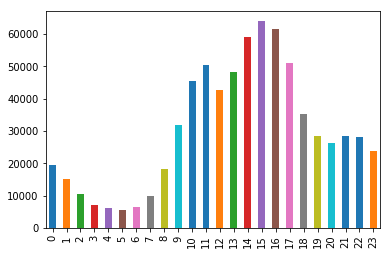

In [17]:
commits_je_stunde.plot.bar()

Wir beschriften nun zusätzlich die Grafik. Dazu speichern wir uns das Rückgabeobjekt der `bar()`-Funktion in der Variable `ax`. Hierbei handelt es sich um ein `Axes`-Objekt der darunterliegenden Plotting-Bibliothek `matplotlib`, durch das wir zusätzliche Eigenschaften des Plots beliebig anpassen können. Wir setzen hier

* den Titel über `set_title(<titelname>)`
* die Beschriftung der X-Achse mit `set_xlabel(<x_achsenname>)` und
* die Beschriftung der Y-Achse mit `set_ylabel(<y_achsenname>)`

Als Ergebnis erhalten wir nun ein ausagekräftiges, beschriftetes Balkendiagramm.

Text(0,0.5,'Commits')

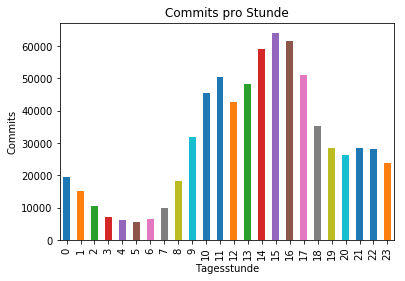

In [18]:
ax = commits_je_stunde.plot.bar()
ax.set_title("Commits pro Stunde")
ax.set_xlabel("Tagesstunde")
ax.set_ylabel("Commits")

Wir können auch nach Wochentagen auswerten. Dazu verwenden wir das `weekday`-Attribut auf dem `DateTime`-Attribut `dt`. Wie üblich, lassen wir hier die Werte über `value_counts` zählen, lassen die Werte aber nicht ihrer Häufigkeit nach sortieren.

In [19]:
commits_je_wochentag = git_log.timestamp.dt.weekday.value_counts(sort=False)
commits_je_wochentag

0    124296
1    131690
2    131019
3    127097
4    117635
5     44877
6     46600
Name: timestamp, dtype: int64

Das Ergebnis in `commits_je_wochentag` lassen wir als ein Balkendiagramm mittels `plot.bar()` ausgeben.

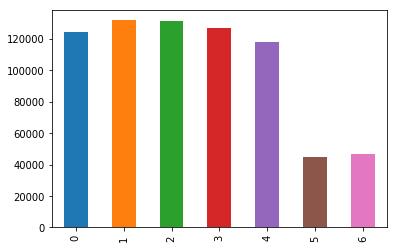

In [20]:
commits_je_wochentag.plot.bar()

## Commit-Verlauf
Nachfolgend wollen wir den Verlauf aller Commits über die letzten Jahre aufzeichnen lassen. Dazu setzen wir die `timestamp` Spalte als Index mittels `set_index(<spaltenname>)`. Zudem selektieren wir lediglich die `author`-Spalte mittels `[<spaltenname>]`. Dadurch arbeiten wir fortlaufend auf einer reinen `Series` statt eines `DataFrame`. Randnotiz: Die Verarbeitung mittels `Series` folgt fast analog wie bei einem `DataFrame`. Eine `Series` wird jedoch nicht so schön in einer Tabelle formatiert angezeigt, weshalb ich persönlich die Bearbeitung mittels `DataFrame` bevorzuge.

In [21]:
git_timed = git_log.set_index('timestamp')['author']
git_timed.head()

timestamp
2017-12-31 14:47:43    Linus Torvalds
2017-12-31 13:13:56    Linus Torvalds
2017-12-31 13:03:05    Linus Torvalds
2017-12-31 12:30:34    Linus Torvalds
2017-12-31 12:29:02    Linus Torvalds
Name: author, dtype: object

Über die `resample(<zeiteinheit>)`-Funktion des `DataFrame`s können wir nun Werte nach bestimmten Zeiteinheiten gruppieren wie z. B. nach Tage (`D`), Monate (`M`), Quartale (`Q`) oder Jahre (`A`). Wir verwenden hier ein `resample("D")` für tageweises zählen. Zudem geben wir noch an, wie die Einzelwerte pro Zeiteinheit zusammengeführt werden sollen. Hierzu wählen wir die `count()`-Funktion, um die Anzahl der Commits für jeden einzelnen Tag zu zählen.

In [22]:
commits_per_day = git_timed.resample("D").count()
commits_per_day.head()

timestamp
2005-04-16    199
2005-04-17     30
2005-04-18     73
2005-04-19     28
2005-04-20      8
Freq: D, Name: author, dtype: int64

Um den Commit-Verlauf über die Jahre hinweg aufzuzeigen, bilden wir die kumulative Summe über alle Tageseinträge mittels `cumsum()`. Damit werden alle Werte nacheinander aufsummiert.

In [23]:
commits_pro_tag_kumulativ = commits_per_day.cumsum()
commits_pro_tag_kumulativ.head()

timestamp
2005-04-16    199
2005-04-17    229
2005-04-18    302
2005-04-19    330
2005-04-20    338
Freq: D, Name: author, dtype: int64

Das Ergebnis plotten wir nun als Liniendiagramm und erhalten somit die Anzahl der Commits über die Jahre hinweg aufgezeichnet.

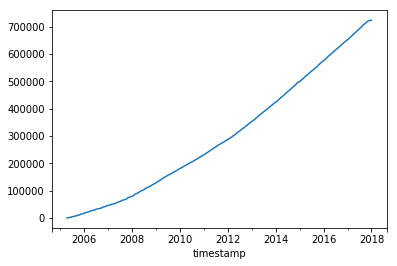

In [24]:
commits_pro_tag_kumulativ.plot()

# Was jetzt noch alles fehlt
Wir haben jetzt einige Grundlagen zu Pandas kennengelernt. Damit kommen wir schon sehr weit in der täglichen Arbeit. Die anderen wichtigen Themenbereiche, die nun noch fehlen, sind:
* Einlesen komplizierter Datenstrukturen
* Bereinigung von schlechter Datenqualität
* Zusammenführen verschiedener Datenquellen
* Gruppieren von gleichartigen Daten mittels `groupby`
* Umformen von `DataFrame`s mittels `pivot_table`